Import and read file

In [423]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

my_file = pd.read_csv('Data/Q1.csv')

Overveiw of data

In [424]:
print(my_file)

     Unnamed: 0        ID                                uni         DS  \
0             0  974285.0                  Shiraz UniVersity   4.613070   
1             1  563921.0                                NaN        NaN   
2             2  308307.0  Isfahan University of Tecchnology  14.193912   
3             3       NaN                  Tabriz University  16.422105   
4             4  570319.0                  Shiraz UniVersity  13.732369   
..          ...       ...                                ...        ...   
995         995  172539.0                  Tabriz University   9.730921   
996         996  961616.0                  Tabriz University   6.493251   
997         997  786197.0                  Tabriz University  17.084436   
998         998  303940.0  Isfahan University of Tecchnology  16.178444   
999         999  207017.0                  Shiraz UniVersity  16.039736   

           ALG         ML         DL         DB         HW         OS  \
0    19.219966  13.777694 

See how many NaN we have, they are not a lot so we can replace them by mean or mode
, We should remove 2 prj which have missing values

In [425]:
my_file.describe()

,Unnamed: 0,ID,DS,ALG,ML,DL,DB,HW,OS,NTW,DSP,STandLAL,prj
count,1000.000000,981.000000,984.000000,990.000000,999.000000,999.000000,999.000000,997.000000,976.000000,999.000000,999.000000,998.000000,998.000000
mean,499.500000,569268.443425,9.984155,10.047551,9.727086,9.779337,10.254198,10.158961,10.148638,10.100439,9.945472,10.300665,56.323630
std,288.819436,259256.995545,5.727724,5.812078,5.695726,5.846354,5.838761,7.433685,6.810457,5.639146,5.801700,5.807904,11.470323
min,0.000000,111180.000000,0.011261,0.055391,0.028951,0.020001,0.000727,-7.390506,-17.611152,0.013312,-9.800960,0.001724,17.717730
25%,249.750000,346820.000000,4.981140,5.038920,4.825376,4.875101,5.295533,5.052606,5.086393,5.512367,5.046048,5.195095,48.375255
50%,499.500000,582333.000000,10.042576,9.916143,9.757582,9.763266,9.968018,9.798136,10.373245,10.097890,9.886944,10.275844,55.968790
75%,749.250000,793472.000000,14.844925,15.104702,14.390722,14.440130,15.424893,15.105341,15.139300,15.068596,15.068522,15.398239,63.836599
max,999.000000,998396.000000,19.974687,19.994559,19.971160,55.236815,19.997719,114.879538,113.497786,19.943678,19.938449,19.941939,91.853542


How many Outlier data each column has
, they are not a lot we can remove each row

In [426]:
clmn = my_file.columns.values
for i in range(4,len(clmn)-1):
  print(i,clmn[i])
  tmp = my_file[clmn[i]].loc[(my_file[clmn[i]] > 20) | (my_file[clmn[i]] < 0)]
  print(tmp.count())
print(13,'prj')
tmp = my_file['prj'].loc[(my_file['prj'] > 100) | (my_file['prj'] < 0)]
print(tmp.count())

4 ALG
0
5 ML
0
6 DL
1
7 DB
0
8 HW
3
9 OS
6
10 NTW
0
11 DSP
1
12 STandLAL
0
13 prj
0


See how many NaN there is, we will fill others with mean or mod , and delete 2 missing in prj because they are in our result should be real

In [427]:
my_file.isna().sum()

Unnamed: 0     0
ID            19
uni           36
DS            16
ALG           10
ML             1
DL             1
DB             1
HW             3
OS            24
NTW            1
DSP            1
STandLAL       2
prj            2
dtype: int64

Delete row which there is NaN in prj

In [428]:
my_file.dropna( subset=["prj"], inplace=True)

Replace all values with abbreviation and missing values with mode

In [429]:
my_file['uni']

0                      Shiraz UniVersity
1                                    NaN
2      Isfahan University of Tecchnology
3                      Tabriz University
4                      Shiraz UniVersity
                     ...                
995                    Tabriz University
996                    Tabriz University
997                    Tabriz University
998    Isfahan University of Tecchnology
999                    Shiraz UniVersity
Name: uni, Length: 998, dtype: object

Obtain mode

In [430]:
my_file['uni'].mode()

0    Tabriz University
dtype: object

Do the fill missing values and replace university names with abbreviation

In [431]:
my_file['uni'] = my_file['uni'].str.lower()

my_file['uni'] = my_file['uni'].replace(to_replace = np.nan, value = 'tu')

t = set()
for i in my_file['uni'].dropna().values:
  t.add(i)

abbreviation = {'shiraz university':'su','ferdowsi university':'fu','isfahan university of technlolgy':'iut','tabriz university':'tu','isfahan university of tecchnology':'iut','azad university':'au','sharif university of technology':'sut','ferdowsi univesity':'fu','university of tehran':'ut','univesity of azarbaijan':'ua'}
for i,j in abbreviation.items():
  my_file['uni'] = my_file['uni'].replace(to_replace = i, value = j)
my_file['uni']


0       su
1       tu
2      iut
3       tu
4       su
      ... 
995     tu
996     tu
997     tu
998    iut
999     su
Name: uni, Length: 998, dtype: object

In [432]:
print(my_file)

     Unnamed: 0        ID  uni         DS        ALG         ML         DL  \
0             0  974285.0   su   4.613070  19.219966  13.777694   1.768949   
1             1  563921.0   tu        NaN  10.416559  10.294882  10.370097   
2             2  308307.0  iut  14.193912  19.516232   8.193591   9.325052   
3             3       NaN   tu  16.422105   9.990100   5.491504   7.267110   
4             4  570319.0   su  13.732369   4.311718   8.025760   5.766623   
..          ...       ...  ...        ...        ...        ...        ...   
995         995  172539.0   tu   9.730921  17.470765  19.294288  16.301405   
996         996  961616.0   tu   6.493251   6.952239  13.344519   8.015453   
997         997  786197.0   tu  17.084436   0.972353   6.509185   6.950973   
998         998  303940.0  iut  16.178444   8.714763  16.791933   3.324486   
999         999  207017.0   su  16.039736   7.994951  11.779989  14.553102   

            DB         HW         OS        NTW        DSP   ST

- Using heatmap and see correlations
- all test scores exept DSP have high corrolation

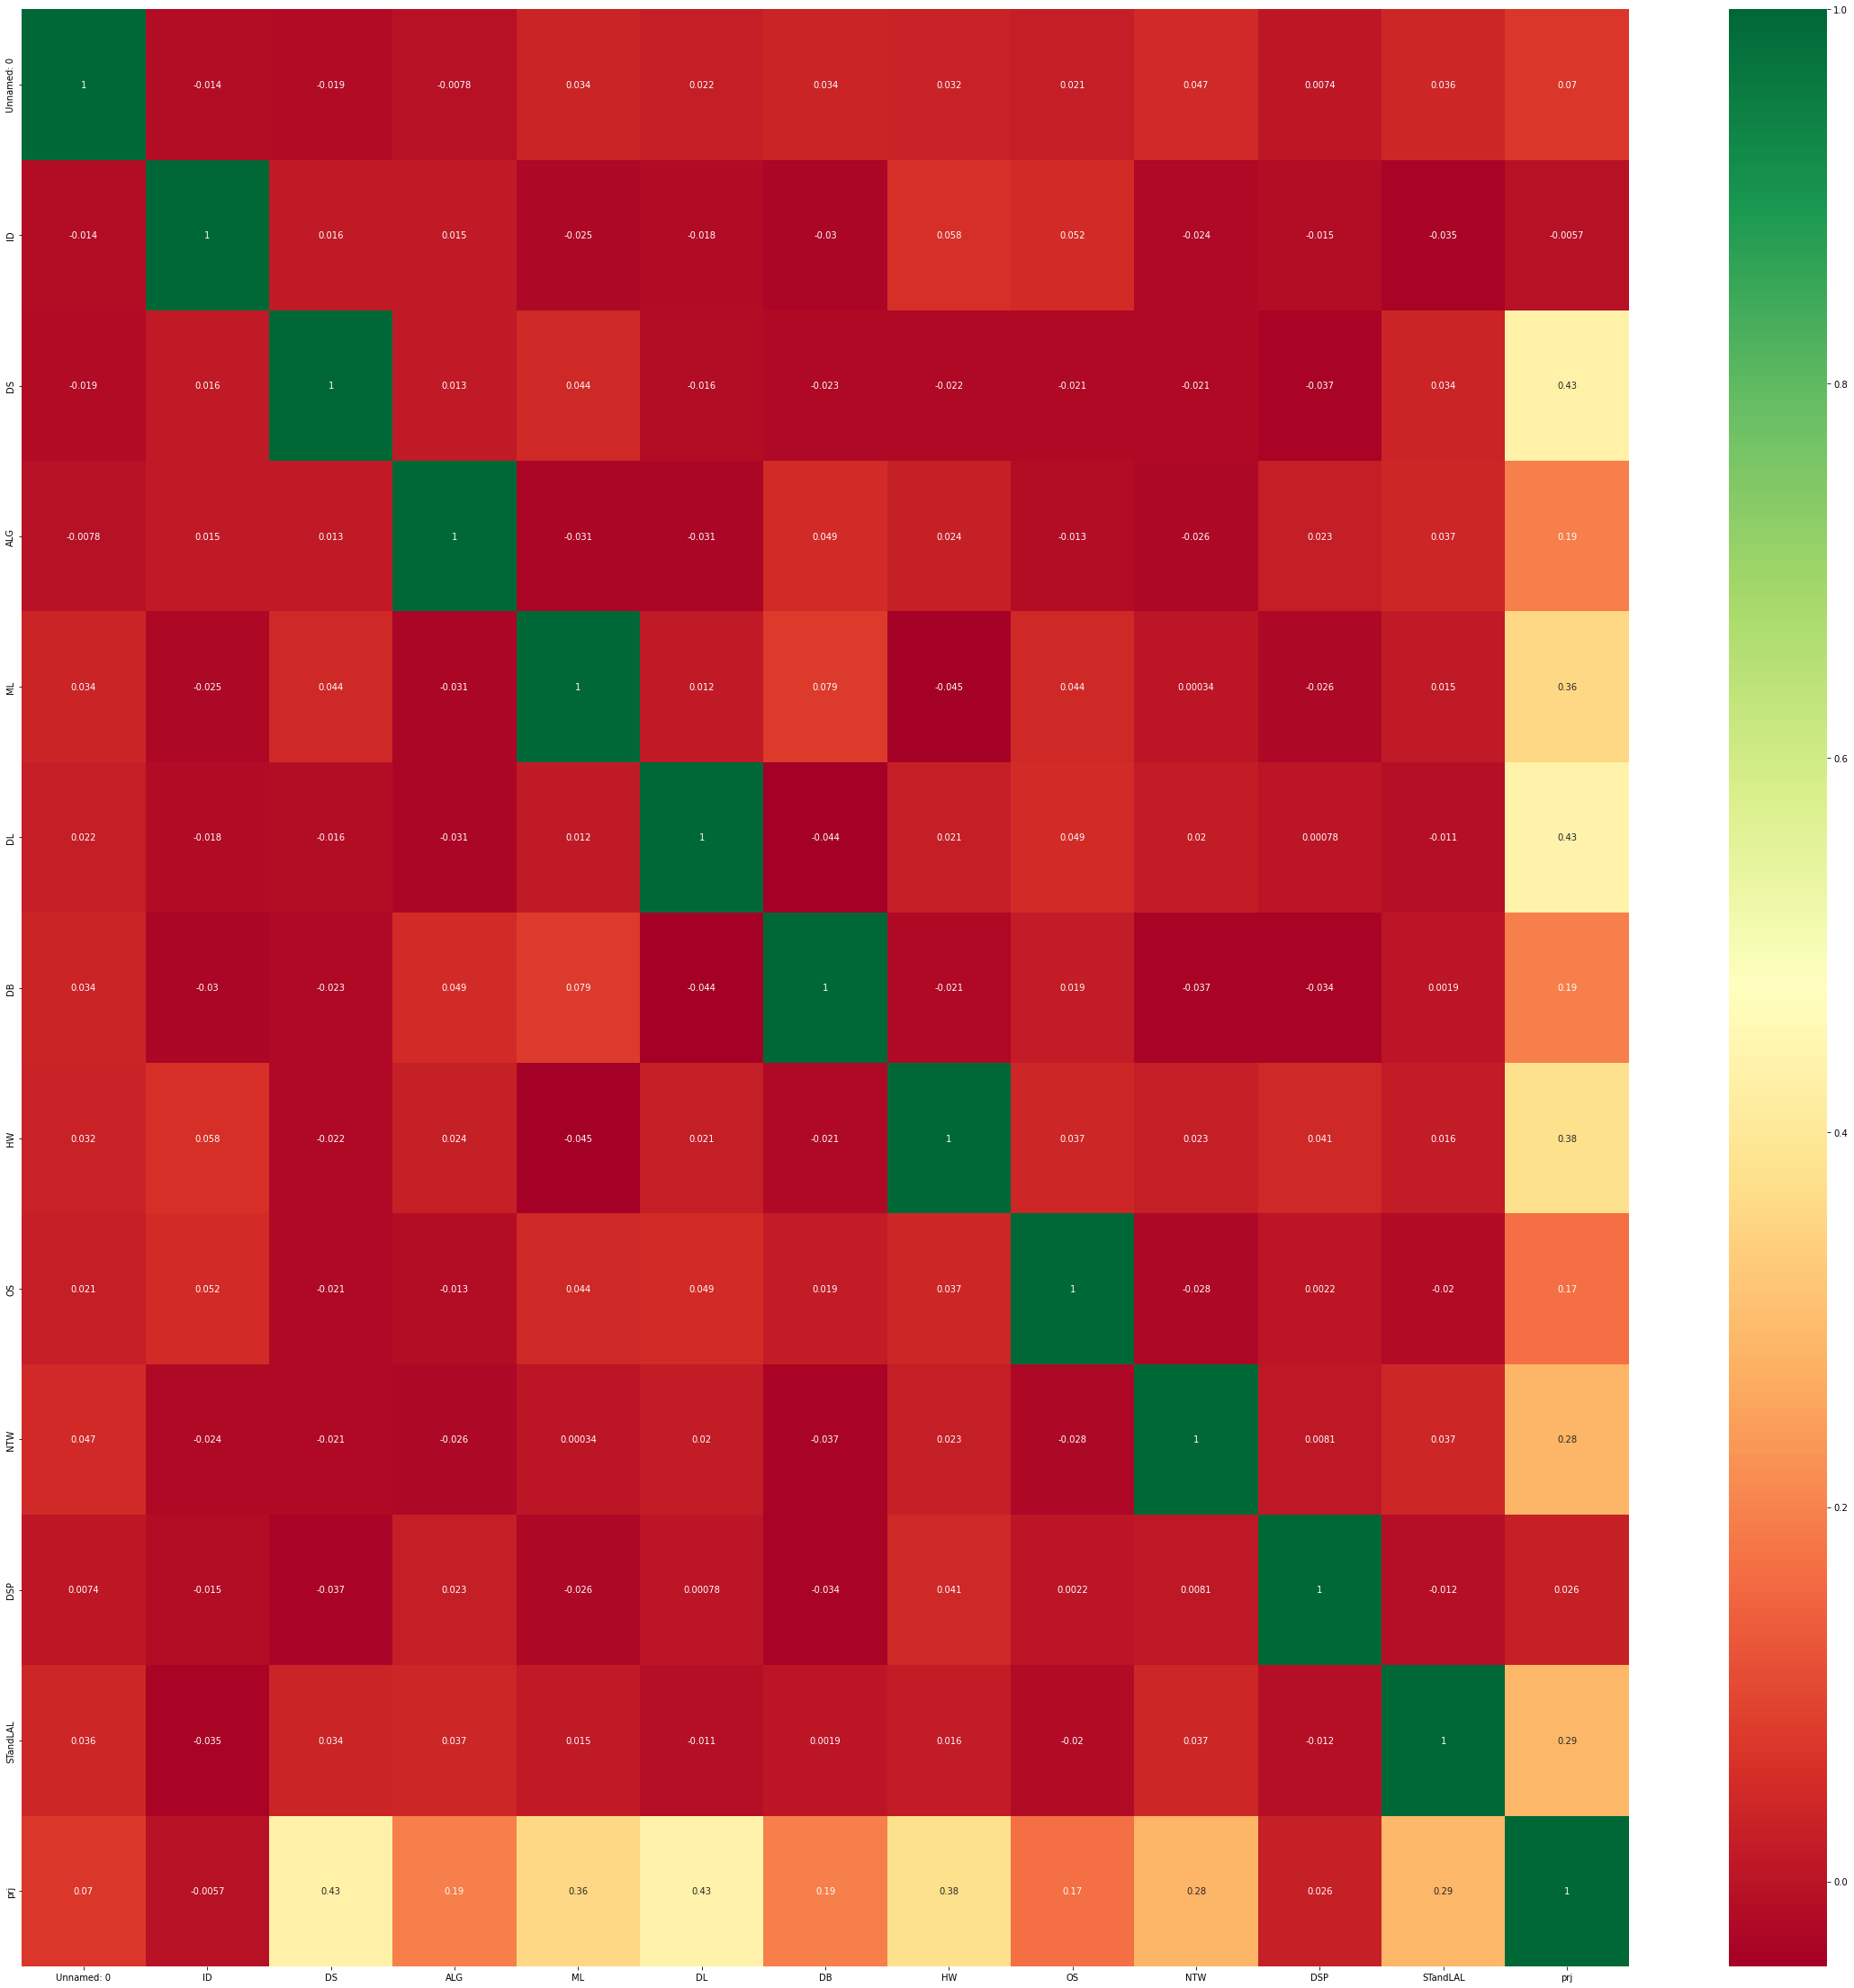

In [433]:
corrmat = my_file.corr()
plt.figure(figsize = (40,40))
my_file[corrmat.index]
g = sns.heatmap(my_file[corrmat.index].corr(), annot = True, cmap ="RdYlGn")

See what column we have

In [434]:
my_file.columns

Index(['Unnamed: 0', 'ID', 'uni', 'DS', 'ALG', 'ML', 'DL', 'DB', 'HW', 'OS',
       'NTW', 'DSP', 'STandLAL', 'prj'],
      dtype='object')

Drop useless column, index and id dont have meaning and value to calculate prj scores

In [435]:
my_file = my_file.drop(columns= ['ID'])
my_file = my_file.drop(columns= ['Unnamed: 0'])

We will drop some rows because outlier data

In [436]:
for i in range(4,len(clmn)-1):
  outlier = my_file[ (my_file[clmn[i]] > 20) | (my_file[clmn[i]] < 0) ].index
  my_file.drop(outlier , inplace=True)

Check the result, we got the goal

In [437]:
my_file.describe()

,DS,ALG,ML,DL,DB,HW,OS,NTW,DSP,STandLAL,prj
count,971.000000,977.000000,986.000000,986.000000,986.000000,984.000000,964.000000,986.000000,986.000000,985.000000,987.000000
mean,9.966849,10.075314,9.716286,9.674316,10.258993,9.981654,10.067717,10.067850,9.967552,10.284636,56.246685
std,5.728549,5.801297,5.702812,5.661467,5.845100,5.806670,5.787721,5.627025,5.768847,5.808221,11.459484
min,0.011261,0.055391,0.028951,0.020001,0.000727,0.009763,0.012460,0.013312,0.012463,0.001724,17.717730
25%,4.978467,5.055205,4.820916,4.810443,5.289306,5.073061,5.091650,5.354773,5.079545,5.193003,48.354776
50%,9.972950,9.916884,9.729294,9.649257,9.961594,9.809230,10.364722,10.063276,9.887062,10.235203,55.838438
75%,14.848262,15.123785,14.392918,14.342194,15.488393,15.088615,15.101905,15.012361,15.069084,15.385390,63.801971
max,19.974687,19.994559,19.971160,19.980380,19.997719,19.978809,19.975692,19.943678,19.938449,19.941939,91.853542


x and y extraction ,number and id and uni column are not selected in x because there is no relation between those and other numerical data ,and select prj as y

In [438]:
x = my_file.iloc[:, :-1].values
y = my_file.iloc[:, -1].values

Encode categorical data

In [439]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 0.0 ... 6.24286434983884 1.28642149444959 18.6074056971013]
 [0.0 0.0 0.0 ... 11.6391549310015 17.5406063052621 0.664260107728969]
 [0.0 0.0 0.0 ... 14.0920475442558 1.23334260880971 9.4413416953742]
 ...
 [0.0 0.0 0.0 ... 15.3847631412536 13.4026884486101 7.22997476892227]
 [0.0 0.0 0.0 ... 14.0789766425468 16.4616141068757 8.70441364038658]
 [0.0 0.0 0.0 ... 11.8327661730584 19.7018623121537 8.235518615932]]


Split test and train ( no Feature scaling needed cz all values are similar and not far away )

In [440]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 98)

Fill NaN for numerical values, we can do it with mean or mod, we have done it with mean, we do it after splitting because dont want to our test be affected by our train

In [441]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x_train[:, :])
imputer2.fit(x_test[:, :])
x_train[:, :] = imputer.transform(x_train[:, :])
x_test[:, :] = imputer.transform(x_test[:, :])

Do Random Forest process, cz multi dimention and high accuracy

In [442]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 98)
regressor1.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=98)

Predict the test and see the result

In [443]:
y_pred = regressor1.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[62.5  62.26]
 [57.76 58.55]
 [68.64 78.17]
 [70.97 72.13]
 [51.78 58.5 ]
 [51.83 54.54]
 [60.27 58.46]
 [53.05 56.61]
 [54.48 48.96]
 [54.39 55.48]
 [63.53 68.56]
 [54.63 52.62]
 [61.67 57.2 ]
 [53.7  53.41]
 [67.64 69.16]
 [72.71 80.98]
 [47.13 44.56]
 [44.48 52.21]
 [64.26 64.59]
 [50.74 55.15]
 [57.21 61.65]
 [70.85 71.61]
 [34.24 38.12]
 [51.17 43.44]
 [59.12 61.97]
 [56.38 51.21]
 [41.4  45.65]
 [60.48 61.4 ]
 [54.49 55.78]
 [57.77 58.52]
 [45.89 46.18]
 [59.66 63.88]
 [67.39 64.56]
 [57.14 60.4 ]
 [57.12 52.82]
 [71.61 79.61]
 [73.88 78.33]
 [57.27 53.39]
 [53.98 58.05]
 [52.43 55.08]
 [61.41 61.2 ]
 [55.2  43.7 ]
 [56.11 53.54]
 [53.23 60.44]
 [52.18 56.69]
 [46.77 48.46]
 [48.35 57.25]
 [54.18 58.73]
 [58.04 58.98]
 [65.75 65.32]
 [66.35 71.76]
 [55.92 56.55]
 [47.53 55.11]
 [53.85 48.88]
 [45.66 49.44]
 [61.41 55.4 ]
 [67.54 69.47]
 [62.36 66.39]
 [54.15 58.29]
 [58.78 60.58]
 [46.69 44.73]
 [36.82 32.54]
 [51.07 52.11]
 [47.54 44.41]
 [56.22 51.31]
 [63.53 64.75]
 [69.2  70

+ Evaluation with confusion, I have cut whole y_pred and y_test to 5 periods
+ It will give us 5*5 confusion matrix the we will calculate TN,TP,FN,FP for each 5 periods
+ I consider 5 cuts cz i think it has proper period length

In [444]:
import copy
cuts = 5
tmp = []
for i in y_pred:
  tmp.append(i)
for i in y_test:
  tmp.append(i)
cat ,qdf = pd.cut(tmp, cuts, precision = 13, retbins=True)

print("Cuts : ", qdf)

tmp = []
for i in range(cuts):
  tmp.append(0)
confusion_matrix = []
for i in range(cuts):
  confusion_matrix.append(copy.deepcopy(tmp))

for i in range(len(y_pred)):
  done = False
  for p in range(len(qdf)-1):
    for q in range(len(qdf)-1):
      if (qdf[p] < y_pred[i] <= qdf[p+1]) and (qdf[q] < y_test[i] <= qdf[q+1]):
        confusion_matrix[q][p] += 1
        done = True
        break
    if done:
      break

print("Confusion Matrix")
for i in confusion_matrix:
  print(i)

Cuts :  [32.48 43.65 54.75 65.86 76.97 88.07]
Confusion Matrix
[11, 11, 0, 0, 0]
[3, 48, 22, 0, 0]
[0, 20, 49, 3, 0]
[0, 0, 13, 11, 0]
[0, 0, 0, 7, 0]


Confusion Matrix

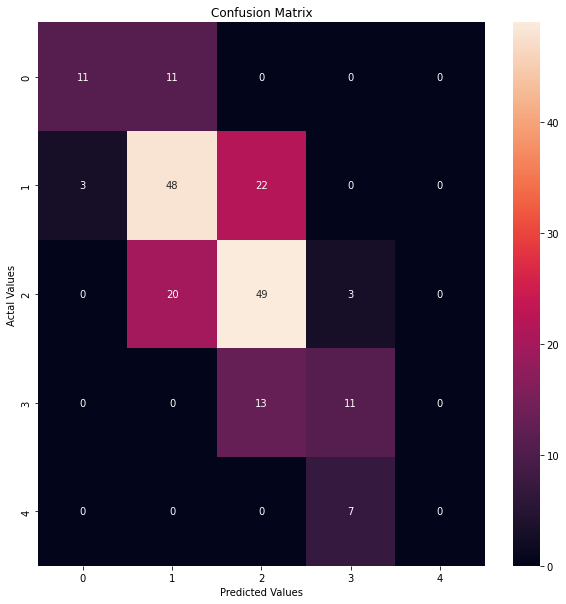

In [445]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Obtain TN,TP,FN,FP from Confusion

In [446]:
TP = {}
TN = {}
FN = {}
FP = {}
for i in range(cuts):
  TP[i] = confusion_matrix[i][i]
  TN[i] = 0
  FN[i] = 0
  FP[i] = 0
  for j in range(cuts):
    if j != i:
      FN[i] += confusion_matrix[i][j]
  for j in range(cuts):
    if j != i:
      FP[i] += confusion_matrix[j][i]
  for j in range(cuts):
    for z in range(cuts):
      if z != i and j != i:
        TN[i] += confusion_matrix[j][z]

Print TN,TP,FN,FP for each cut

In [447]:
for i in range(cuts):
  print("Cut number: ",i+1)
  print("TP : ",TP[i])
  print("TN : ",TN[i])
  print("FN : ",FN[i])
  print("FP : ",FP[i])

Cut number:  1
TP :  11
TN :  173
FN :  11
FP :  3
Cut number:  2
TP :  48
TN :  94
FN :  25
FP :  31
Cut number:  3
TP :  49
TN :  91
FN :  23
FP :  35
Cut number:  4
TP :  11
TN :  164
FN :  13
FP :  10
Cut number:  5
TP :  0
TN :  191
FN :  7
FP :  0


Calcualte accuracy, precision, recall

Accuracy

In [448]:
print("Accuracy : ")
total = 0
for i in range(cuts):
  print("Cut number: ",i+1)
  total += (TP[i]+TN[i])/len(y_test)
  print((TP[i]+TN[i])/len(y_test))
print("Total : ",total/cuts)

Accuracy : 
Cut number:  1
0.9292929292929293
Cut number:  2
0.7171717171717171
Cut number:  3
0.7070707070707071
Cut number:  4
0.8838383838383839
Cut number:  5
0.9646464646464646
Total :  0.8404040404040403


Precision

In [449]:
print("Precision : ")
total = 0
for i in range(cuts):
  print("Cut number: ",i+1)
  if TP[i] == 0:
    print(0)
  else:
    print((TP[i])/(TP[i] + FP[i]))
    total += (TP[i])/(TP[i] + FP[i])
print("Total : ",total/cuts)

Precision : 
Cut number:  1
0.7857142857142857
Cut number:  2
0.6075949367088608
Cut number:  3
0.5833333333333334
Cut number:  4
0.5238095238095238
Cut number:  5
0
Total :  0.5000904159132007


Recall

In [450]:
print("Recall : ")
total = 0
for i in range(cuts):
  print("Cut number: ",i+1)
  if TP[i] == 0:
    print(0)
  else:
    print((TP[i])/(TP[i] + FN[i]))
    total += (TP[i])/(TP[i] + FN[i])
print("Total : ",total/cuts)

Recall : 
Cut number:  1
0.5
Cut number:  2
0.6575342465753424
Cut number:  3
0.6805555555555556
Cut number:  4
0.4583333333333333
Cut number:  5
0
Total :  0.45928462709284623


Starting the Deep Learning with spliting to x and y, onehotencoding categoricals, split into train & test and fill missing values

In [451]:
x = my_file.iloc[:, :-1].values
y = my_file.iloc[:, -1].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 98)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x_train[:, :])
imputer2.fit(x_test[:, :])
x_train[:, :] = imputer.transform(x_train[:, :])
x_test[:, :] = imputer.transform(x_test[:, :])

Scale whole data with standardization

In [452]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
sc2 = StandardScaler()
y_train = sc2.fit_transform(pd.DataFrame(y_train))
y_test = sc2.transform(pd.DataFrame(y_test))

Initialization of DL with import tensorflow and make the model

In [453]:
import tensorflow as tf
tf.__version__

ann = tf.keras.models.Sequential()

Input layer

In [454]:
ann.add(tf.keras.layers.Dense(units = 11, input_dim = 20, activation = "relu"))

Hidden layers

In [455]:
ann.add(tf.keras.layers.Dense(units = 8, activation = "relu"))

ann.add(tf.keras.layers.Dense(units = 10, activation = "relu"))

Output layers

In [456]:
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

Compile and Train

In [457]:
ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse','MAE'])
history = ann.fit(x_train, y_train, batch_size = 2, epochs = 50)

Epoch 1/50
395/395 [==============================] - 1s 1ms/step - loss: 0.9986 - mse: 0.9986 - MAE: 0.7966
Epoch 2/50
395/395 [==============================] - 0s 1ms/step - loss: 0.7234 - mse: 0.7234 - MAE: 0.6446
Epoch 3/50
395/395 [==============================] - 0s 1ms/step - loss: 0.6243 - mse: 0.6243 - MAE: 0.5739
Epoch 4/50
395/395 [==============================] - 0s 1ms/step - loss: 0.6032 - mse: 0.6032 - MAE: 0.5580
Epoch 5/50
395/395 [==============================] - 0s 1ms/step - loss: 0.5950 - mse: 0.5950 - MAE: 0.5487
Epoch 6/50
395/395 [==============================] - 0s 1ms/step - loss: 0.5910 - mse: 0.5910 - MAE: 0.5426
Epoch 7/50
395/395 [==============================] - 0s 1ms/step - loss: 0.5879 - mse: 0.5879 - MAE: 0.5383
Epoch 8/50
395/395 [==============================] - 0s 1ms/step - loss: 0.5848 - mse: 0.5848 - MAE: 0.5341
Epoch 9/50
395/395 [==============================] - 0s 1ms/step - loss: 0.5792 - mse: 0.5792 - MAE: 0.5282
Epoch 10/50
395/395

Predict the independent var with test

In [458]:
y_pred = ann.predict(x_test)

7/7 [==============================] - 0s 1ms/step


Epoch - MAE and loss

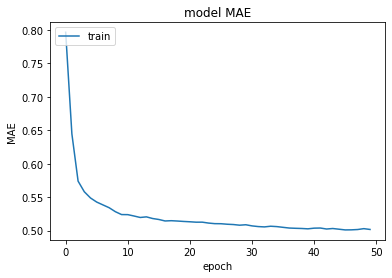

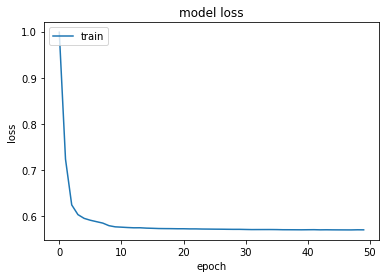

In [459]:
plt.plot(history.history['MAE'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Calculate Confusion Matrix

In [460]:
cuts = 5
tmp = []

y_pred = sc2.inverse_transform(y_pred)
y_test = sc2.inverse_transform(y_test)
y_train = sc2.inverse_transform(y_train)

for i in y_pred:
  tmp.append(float(i))
for i in y_test:
  tmp.append(float(i))

cat ,qdf = pd.cut(tmp, cuts, precision = 13, retbins=True)

print("Cuts : ", qdf)

tmp = []
for i in range(cuts):
  tmp.append(0)

confusion_matrix = []
for i in range(cuts):
  confusion_matrix.append(copy.deepcopy(tmp))

for i in range(len(y_pred)):
  done = False
  for p in range(len(qdf)-1):
    for q in range(len(qdf)-1):
      if (qdf[p] < y_pred[i] <= qdf[p+1]) and (qdf[q] < y_test[i] <= qdf[q+1]):
        confusion_matrix[q][p] += 1
        done = True
        break
    if done:
      break

print("Confusion Matrix")
for i in confusion_matrix:
  print(i)

Cuts :  [32.48 43.65 54.75 65.86 76.97 88.07]
Confusion Matrix
[0, 0, 22, 0, 0]
[0, 0, 73, 0, 0]
[0, 0, 70, 2, 0]
[0, 0, 0, 24, 0]
[0, 0, 0, 7, 0]


Confusion Matrix

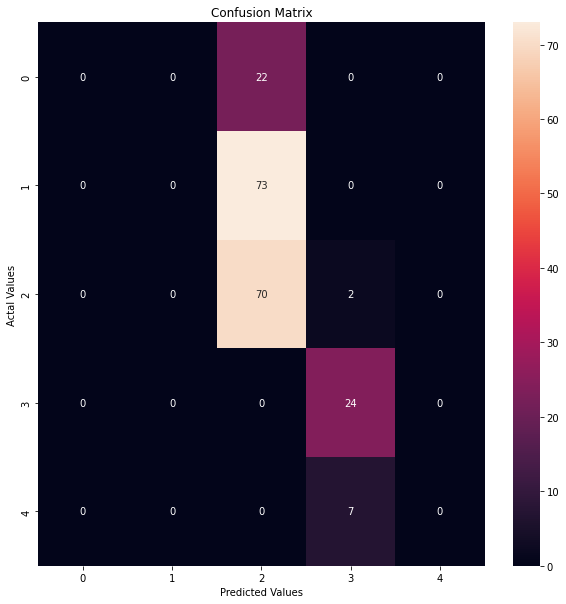

In [461]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Calculate TP,TN,FN,FP

In [462]:
TP = {}
TN = {}
FN = {}
FP = {}
for i in range(cuts):
  TP[i] = confusion_matrix[i][i]
  TN[i] = 0
  FN[i] = 0
  FP[i] = 0
  for j in range(cuts):
    if j != i:
      FN[i] += confusion_matrix[i][j]
  for j in range(cuts):
    if j != i:
      FP[i] += confusion_matrix[j][i]
  for j in range(cuts):
    for z in range(cuts):
      if z != i and j != i:
        TN[i] += confusion_matrix[j][z]

for i in range(cuts):
  print("Cut number: ",i+1)
  print("TP : ",TP[i])
  print("TN : ",TN[i])
  print("FN : ",FN[i])
  print("FP : ",FP[i])

Cut number:  1
TP :  0
TN :  176
FN :  22
FP :  0
Cut number:  2
TP :  0
TN :  125
FN :  73
FP :  0
Cut number:  3
TP :  70
TN :  31
FN :  2
FP :  95
Cut number:  4
TP :  24
TN :  165
FN :  0
FP :  9
Cut number:  5
TP :  0
TN :  191
FN :  7
FP :  0


Accuracy

In [463]:
print("Accuracy : ")
total = 0
for i in range(cuts):
  print("Cut number: ",i+1)
  total += (TP[i]+TN[i])/len(y_test)
  print((TP[i]+TN[i])/len(y_test))
print("Total : ",total/cuts)

Accuracy : 
Cut number:  1
0.8888888888888888
Cut number:  2
0.6313131313131313
Cut number:  3
0.51010101010101
Cut number:  4
0.9545454545454546
Cut number:  5
0.9646464646464646
Total :  0.7898989898989899


Precision

In [464]:
print("Precision : ")
total = 0
for i in range(cuts):
  print("Cut number: ",i+1)
  if TP[i] == 0:
    print(0)
  else:
    print((TP[i])/(TP[i] + FP[i]))
    total += (TP[i])/(TP[i] + FP[i])
print("Total : ",total/cuts)

Precision : 
Cut number:  1
0
Cut number:  2
0
Cut number:  3
0.42424242424242425
Cut number:  4
0.7272727272727273
Cut number:  5
0
Total :  0.23030303030303031


Recall

In [465]:
print("Recall : ")
total = 0
for i in range(cuts):
  print("Cut number: ",i+1)
  if TP[i] == 0:
    print(0)
  else:
    print((TP[i])/(TP[i] + FN[i]))
    total += (TP[i])/(TP[i] + FN[i])
print("Total : ",total/cuts)

Recall : 
Cut number:  1
0
Cut number:  2
0
Cut number:  3
0.9722222222222222
Cut number:  4
1.0
Cut number:  5
0
Total :  0.3944444444444445
